# A/B Testing

A shoe company sells two models: UA101 and UA102. They wanted to improve their sales and so, ran an aggressive campaign.

The sales data before the campaign, during the campaign and after the campaign are provided.

Can you help them figure out if the campaign was successful or not? What additional insights will you provide them ?

In [1]:
#import the necessary datasets
import pandas as pd
import numpy as np

In [3]:
pd.__version__

'0.19.1'

In [4]:
!pip install xlrd

    100% |################################| 153kB 363kB/s 


In [5]:
#Read the dataset
shoes_before = pd.read_excel("data/shoe_sales_before.xlsx")
shoes_during = pd.read_excel("data/shoe_sales_during.xlsx")
shoes_after = pd.read_excel("data/shoe_sales_after.xlsx")

In [6]:
shoes_before.head()

,UA101,UA102
0,12,6
1,4,7
2,11,16
3,6,12
4,6,18


In [7]:
#What was the mean sales 
#before, during and after for the two shoe models
#Hint: use df.mean function
print("Before Campaign:")
print(shoes_before.mean())
print()
print("During Campaign:")
print(shoes_during.mean())
print()
print("After Campaign:")
print(shoes_after.mean())

Before Campaign:
UA101     7.933333
UA102    11.966667
dtype: float64

During Campaign:
UA101    15.683333
UA102    21.100000
dtype: float64

After Campaign:
UA101    10.683333
UA102    14.750000
dtype: float64


#### Variance

> Once two statistician of height 4 feet and 5 feet have to cross a river of AVERAGE depth 3 feet. Meanwhile, a third person comes and said, "what are you waiting for? You can easily cross the river"

It's the average distance of the data values from the *mean*

<img style="float: left;" src="img/variance.png" height="320" width="320">


<br>
<br>

#### Standard Deviation

It is the square root of variance. This will have the same units as the data and mean. 

In [9]:
shoes_before.head()

,UA101,UA102
0,12,6
1,4,7
2,11,16
3,6,12
4,6,18


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Find the standard deviation of the sales

print("Before Campaign:")
print(shoes_before.std())
print()
print("During Campaign:")
print(shoes_during.std())
print()
print("After Campaign:")
print(shoes_after.std())

Before Campaign:
UA101    2.455479
UA102    3.914193
dtype: float64

During Campaign:
UA101    5.133775
UA102    7.500734
dtype: float64

After Campaign:
UA101    2.619947
UA102    6.110910
dtype: float64


#### Co-variance 

covariance as a measure of the (average) co-variation between two variables, say x and y. Covariance describes both how far the variables are spread out, and the nature of their relationship, Covariance is a measure of how much two variables change together. Compare this to Variance, which is just the range over which one measure (or variable) varies.

<img style="float: left;" src="img/covariance.png" height="270" width="270">

<br>
<br>
<br>
<br>



In [14]:
#Find the covariance of the sales
#Use the cov function

print("Before Campaign:")
print(shoes_before.cov())
print()
print("During Campaign:")
print(shoes_during.cov())
print()
print("After Campaign:")
print(shoes_after.cov())

Before Campaign:
          UA101      UA102
UA101  6.029379  -0.764972
UA102 -0.764972  15.320904

During Campaign:
           UA101      UA102
UA101  26.355650   6.642373
UA102   6.642373  56.261017

After Campaign:
          UA101      UA102
UA101  6.864124   3.495763
UA102  3.495763  37.343220


### Correlation

Extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

<img style="float: left;" src="img/correlation.gif" height="270" width="270">

<br>
<br>
<br>



In [15]:
import seaborn as sns

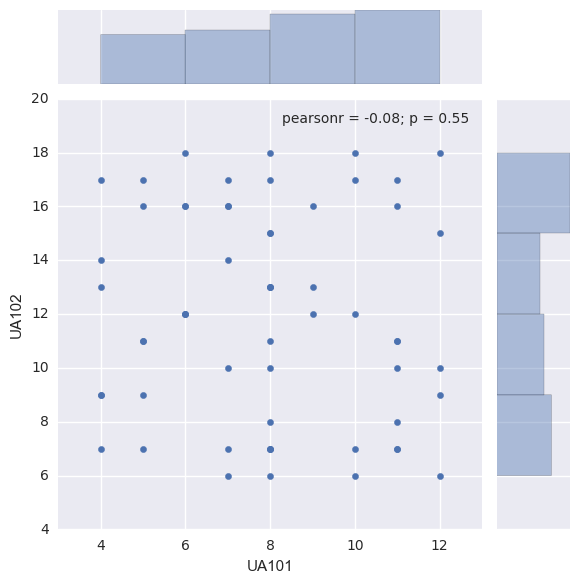

In [17]:
sns.jointplot(x= "UA101", y ="UA102", data=shoes_before)

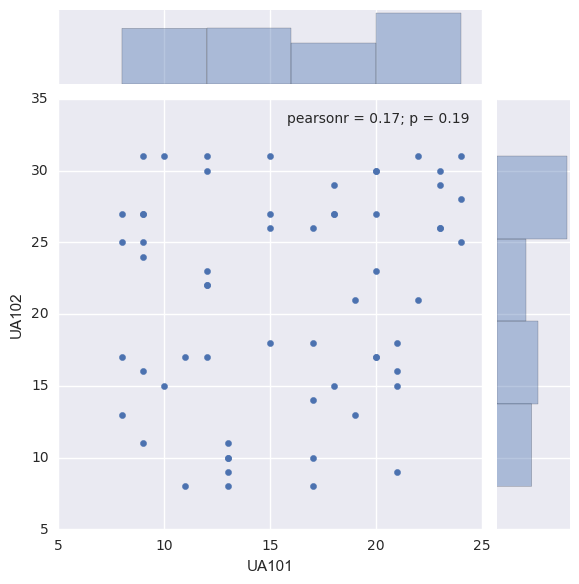

In [19]:
sns.jointplot(x= "UA101", y ="UA102", data=shoes_during)

In [18]:
#Find correlation between sales
print("Before Campaign:")
print(shoes_before.corr())
print()
print("During Campaign:")
print(shoes_during.corr())
print()
print("After Campaign:")
print(shoes_after.corr())

Before Campaign:
          UA101     UA102
UA101  1.000000 -0.079592
UA102 -0.079592  1.000000

During Campaign:
          UA101     UA102
UA101  1.000000  0.172497
UA102  0.172497  1.000000

After Campaign:
          UA101     UA102
UA101  1.000000  0.218345
UA102  0.218345  1.000000


# Correlation != Causation

correlation between two variables does not necessarily imply that one causes the other.


<img style="float: left;" src="img/correlation_not_causation.gif" height="570" width="570">

In [20]:
#Let's do some analysis on UA101 now

In [21]:
#Find difference between mean sales before and after the campaign

np.mean(shoes_after.UA101) - np.mean(shoes_before.UA101)

2.75

On average, the sales after campaign is more than the sales before campaign. But is the difference legit? Could it be due to chance?

**Classical Method** : *t-test*

**Hacker's Method** : provided in notebook 2c


# Effect Size

> **Because you can't argue with all the fools in the world. It's easier to let them have their way, then trick them when they're not paying attention**  - Christopher Paolini

In [22]:
#Find %increase in mean sales
(np.mean(shoes_after.UA101) - np.mean(shoes_before.UA101))/np.mean(shoes_after.UA101) * 100

25.741029641185648

Would business feel comfortable spending millions of dollars if the increase is going to be 25%. 

Does it work for the company? 

Maybe yes - if margins are good and this increase is considered good. But if the returns from the campaign does not let the company break even, it makes no sense to take that path.

> Someone tells you the result is statistically significant. The first question you should ask?

# How large is the effect?

To answer such a question, we will make use of the concept **confidence interval**

In plain english, *confidence interval* is the range of values the measurement metric is going to take. 

An example would be: 90% of the times, the increase in average sales (before and after campaign) would be within the bucket `3.4 and 6.7` (These numbers are illustrative. We will derive those numbers below)


Hacker's way to do this: Bootstrapping 

(We will use the library here though)

### Where do we go from here? 

First of all there are two points to be made.

1. Whey do we need signficance testing if confidence intervals can provide us more information?
2. How does it relate to the traditional statistical procedure of finding confidence intervals

For the first one:

What if sales in the first month after campaign was 80 and the month before campaign was 40. The difference is 40. And confidence interval,as explained above, using replacements, would always generate 40. But if we do the significance testing, as detailed above - where the labels are shuffled, the sales are equally likely to occur in both the groups. And so, significance testing would answer that there was no difference. But don't we all know that the data is **too small** to make meaningful inferences?

For the second one:

Traditional statistics derivation assumes normal distribution. But what if the underlying distribution isn't normal? Also, people relate to resampling much better :-) 

### Standard Error

It is a measure of how far the estimate to be off, on average. More technically, it is the standard deviation of the sampling distribution of a statistic(mostly the mean). Please do not confuse it with *standard deviation*. Standard deviation is a measure of the variability of the observed quantity. Standard error, on the other hand, describes variability of the estimate. 



In [23]:
from scipy import stats

In [24]:
#Standard error for mean sales before campaign
stats.sem(shoes_before.UA101)

0.31700101290777827

# Hypothesis Testing

(We are covering, what is referred to as, frequentist method of Hypothesis testing)

We would like to know if the effects we see in the sample(observed data) are likely to occur in the population. 

The way classical hypothesis testing works is by conducting a statistical test to answer the following question:
> Given the sample and an effect, what is the probability of seeing that effect just by chance?

Here are the steps on how we would do this

1. Define null hypothesis
2. Compute test statistic
3. Compute p-value
4. Interpret the result

If p-value is very low(most often than now, below 0.05), the effect is considered statistically significant. That means that effect is unlikely to have occured by chance. The inference? The effect is likely to be seen in the population too. 

This process is very similar to the *proof by contradiction* paradigm. We first assume that the effect is false. That's the null hypothesis. Next step is to compute the probability of obtaining that effect (the p-value). If p-value is very low(<0.05 as a rule of thumb), we reject the null hypothesis. 

In [25]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
%matplotlib inline

In [26]:
import seaborn as sns
sns.set(color_codes=True)

In [27]:
#Mean of sales before campaign
shoes_before.UA101.mean()

7.9333333333333336

In [28]:
#Confidence interval on the mean of sales before campaign
stats.norm.interval(0.95, loc=shoes_before.UA101.mean(), 
scale = shoes_before.UA101.std()/np.sqrt(len(shoes_before)))

(7.3120227649713714, 8.5546439016952966)

In [37]:
#Find 80% Confidence interval

In [42]:
#Find mean and 95% CI on mean of sales after campaign
print(shoes_after.UA101.mean())
stats.norm.interval(0.95, loc=shoes_after.UA101.mean(), 
scale = shoes_after.UA101.std()/np.sqrt(len(shoes_after)))

10.683333333333334


(10.02040735940283, 11.346259307263837)

In [38]:
#What does confidence interval mean? 

In [29]:
#Effect size

In [40]:
print("Effect size:", shoes_after.UA101.mean() 
      - shoes_before.UA101.mean() )

Effect size: 2.75


**Null Hypothesis**: Mean sales aren't significantly different

Perform **t-test** and determine the p-value. 

In [29]:
stats.ttest_ind(shoes_before.UA101, 
shoes_after.UA101, equal_var=True)

Ttest_indResult(statistic=-5.9322966356692888, pvalue=3.0560627719645606e-08)

p-value is the probability that the effective size was by chance. And here, p-value is almost 0.

*Conclusion*: The sales difference is significant. 

### Assumption of t-test

One assumption is that the data used came from a normal distribution. 
<br>
There's a [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro-Wilk) to test for normality. If p-value is less than 0.05, then there's a low chance that the distribution is normal.

In [30]:
stats.shapiro(shoes_before.UA101)

(0.9386103749275208, 0.00469556450843811)

In [51]:
?stats.shapiro

<h2> Something to think about: Which of these give smaller p-values ? </h2>
   
   * Smaller effect size
   * Smaller standard error
   * Smaller sample size
   * Higher variance
   
   **Answer:** (Homework :-) )

### Class-work

**Question 1:**
Do the same analysis on UA102 and report your insights.

**Question 2:**
How different were the sales between the two models during campaign?